In [1]:
from importlib import reload
import matplotlib.pyplot as plt

def init():
    from ptycho import params as p
    p.cfg['size'] = 392
    p.cfg['positions.provided'] = False
    p.cfg['data_source'] = 'lines'
    p.cfg['nepochs'] = 60
    p.cfg['set_phi'] = True
    p.cfg['nphotons'] = 1e4

    p.cfg['offset'] = 4
    p.cfg['max_position_jitter'] = 3
    p.cfg['output_prefix'] = 'lines3'

    p.cfg['gridsize'] = 1 # CHANGED
    p.cfg['n_filters_scale'] = 2
    p.cfg['object.big'] = True
    p.cfg['intensity_scale.trainable'] = True
    p.cfg['probe.trainable'] = False
    
    p.cfg['outer_offset_train'] = 8
    p.cfg['outer_offset_test'] = 20
    p.cfg['nimgs_train'] = 2
    p.cfg['nimgs_test'] = 2
    
init()

from ptycho.evaluation import save_metrics
from ptycho.evaluation import trim
from ptycho import tf_helper as hh
from ptycho import probe


2024-11-06 17:26:47.352752: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-06 17:26:47.352784: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-06 17:26:47.354038: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-06 17:26:47.359802: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-06 17:26:47.979096: W tensorflow/compiler/tf2

2 items had no tests:
    __main__
    __main__.init
0 tests in 2 items.
0 passed and 0 failed.
Test passed.


/home/ollie/anaconda3/envs/py310_3/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
2024-11-06 17:26:49.028365: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-06 17:26:49.028611: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read fr

In [2]:
probe.set_default_probe()


from ptycho import params as p
from ptycho import generate_data as init

DEBUG: Setting probe to tf.Tensor(
[[[1.0893617e-09+0.j]
  [1.0893617e-09+0.j]
  [1.0893617e-09+0.j]
  ...
  [1.0893617e-09+0.j]
  [1.0893617e-09+0.j]
  [1.0893617e-09+0.j]]

 [[1.0893617e-09+0.j]
  [1.0893617e-09+0.j]
  [1.0893617e-09+0.j]
  ...
  [1.0893617e-09+0.j]
  [1.0893617e-09+0.j]
  [1.0893617e-09+0.j]]

 [[1.0893617e-09+0.j]
  [1.0893617e-09+0.j]
  [1.0893617e-09+0.j]
  ...
  [1.0893617e-09+0.j]
  [1.0893617e-09+0.j]
  [1.0893617e-09+0.j]]

 ...

 [[1.0893617e-09+0.j]
  [1.0893617e-09+0.j]
  [1.0893617e-09+0.j]
  ...
  [1.0893617e-09+0.j]
  [1.0893617e-09+0.j]
  [1.0893617e-09+0.j]]

 [[1.0893617e-09+0.j]
  [1.0893617e-09+0.j]
  [1.0893617e-09+0.j]
  ...
  [1.0893617e-09+0.j]
  [1.0893617e-09+0.j]
  [1.0893617e-09+0.j]]

 [[1.0893617e-09+0.j]
  [1.0893617e-09+0.j]
  [1.0893617e-09+0.j]
  ...
  [1.0893617e-09+0.j]
  [1.0893617e-09+0.j]
  [1.0893617e-09+0.j]]], shape=(64, 64, 1), dtype=complex64) in params
No cached result found. Calculating and caching the result.
simulating g

In [3]:
(np.angle(p.get('probe')), np.angle(init.ptycho_dataset.train_data.probe))

NameError: name 'np' is not defined

In [3]:
# init.ptycho_dataset.train_data.to_npz('lines_with_phase_1e9.npz')
# init.ptycho_dataset.train_data.to_npz('lines_with_phase_1e4.npz')
# init.ptycho_dataset.train_data.to_npz('lines_no_overlap.npz')

In [4]:
init.ptycho_dataset.train_data.Y.shape

TensorShape([13778, 64, 64, 1])

In [5]:
init.X_train.shape

(13778, 64, 64, 1)

## Full PINN model, best params:

In [ ]:
from ptycho import params as p
p.cfg['data_source'] = 'lines'
p.cfg['offset'] = 4
p.cfg['max_position_jitter'] = 10
p.cfg['output_prefix'] = 'lines2'

p.cfg['gridsize'] = 1 # CHANGED
p.cfg['n_filters_scale'] = 2
p.cfg['object.big'] = True
p.cfg['intensity_scale.trainable'] = True

from ptycho import train, model
# reload(model)
# reload(train)

# print(p.cfg)
from ptycho.train import *

DEBUG: Setting timestamp to 10/18/2024, 16:12:39 in params
input shape (None, 64, 64, 1)
Instructions for updating:
Please pass an integer value for `reinterpreted_batch_ndims`. The current behavior corresponds to `reinterpreted_batch_ndims=tf.size(distribution.batch_shape_tensor()) - 1`.
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input (InputLayer)          [(None, 64, 64, 1)]          0         []                            
                                                                                                  
 tf.math.truediv (TFOpLambd  (None, 64, 64, 1)            0         ['input[0][0]']               
 a)                                                                                               
                                                                                                  
 c

2024-10-18 16:12:40.395592: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-10-18 16:12:40.395610: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-10-18 16:12:40.395635: I external/local_xla/xla/backends/profiler/gpu/cupti_tracer.cc:1883] Profiler found 1 GPUs
2024-10-18 16:12:40.416794: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:163] cuptiEnableCallback: error 1: CUPTI_ERROR_INVALID_PARAMETER
2024-10-18 16:12:40.416806: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:449] CuptiErrorManager is disabling profiling automatically.
2024-10-18 16:12:40.416811: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:449] CuptiErrorManager is disabling profiling automatically.
2024-10-18 16:12:40.416817: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:459] cuptiGetResultString: ignored due to a previous error.
202

Epoch 1/60
input shape (None, 64, 64, 1)
input shape (None, 64, 64, 1)


2024-10-18 16:12:44.520232: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-10-18 16:12:44.520740: I tensorflow/core/util/cuda_solvers.cc:179] Creating GpuSolver handles for stream 0x616f8a41c4f0
2024-10-18 16:12:45.864989: I external/local_xla/xla/service/service.cc:168] XLA service 0x7c6ce8155040 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-10-18 16:12:45.865019: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-10-18 16:12:45.868427: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1729282365.934668 3207425 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


819/819 [==============================] - 14s 10ms/step - loss: 7349731.5000 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 5.7585 - distribution_lambda_loss: 7349731.5000 - val_loss: 1458898.6250 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 4.7499 - val_distribution_lambda_loss: 1458898.6250 - lr: 0.0010
Epoch 2/60
819/819 [==============================] - 7s 8ms/step - loss: 1439504.6250 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 4.6080 - distribution_lambda_loss: 1439504.6250 - val_loss: 1162846.7500 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 4.4279 - val_distribution_lambda_loss: 1162846.7500 - lr: 0.0010
Epoch 3/60
819/819 [==============================] - 7s 8ms/step - loss: 960167.9375 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 4.1413 - distribution_lambda_loss: 960167.9375 - val_loss: 802042.6875 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 4.0560 - val_distribution_lambda_loss: 802

INFO:tensorflow:Assets written to: lines2/10-18-2024-16.12.39_//wts.h5_autoencoder/assets


INFO:tensorflow:Assets written to: lines2/10-18-2024-16.12.39_//wts.h5_diffraction_to_obj/assets


INFO:tensorflow:Assets written to: lines2/10-18-2024-16.12.39_//wts.h5_diffraction_to_obj/assets


In [ ]:
from ptycho import train_pinn 

In [ ]:
d = save_metrics(stitched_obj, YY_ground_truth, label = 'PINN,NLL,overlaps')
d
#d0 = d

subtracting mean -0.780724
subtracting mean 0.15387884
mean scale adjustment: 10.030342
mean scale adjustment: 10.030342
performed by index method
performed by index method
performed by index method
mean scale adjustment: 1
mean scale adjustment: 1
performed by index method
performed by index method
performed by index method


{'mae': (0.07534945, 0.062137887),
 'mse': (0.009002069, 0.006049986),
 'psnr': (68.58737984594642, 70.31325942878128),
 'frc50': (74, 75)}

In [6]:
d = save_metrics(stitched_obj, YY_ground_truth, label = 'PINN,NLL,overlaps')
d
#d0 = d

subtracting mean 0.92998075
subtracting mean 0.15387884
mean scale adjustment: 10.069044
mean scale adjustment: 10.069044
performed by index method
performed by index method
performed by index method
mean scale adjustment: 1
mean scale adjustment: 1
performed by index method
performed by index method
performed by index method


{'mae': (0.034726832, 0.01437747),
 'mse': (0.0019644932, 0.0003375906),
 'psnr': (75.19829815656979, 82.84689963894492),
 'frc50': (165, 165)}

In [18]:
np.abs(stitched_obj[0]).std(), np.angle(stitched_obj[0]).std()

(0.064053416, 0.23748358)

In [13]:
np.abs(stitched_obj)[0].max()

0.49898022

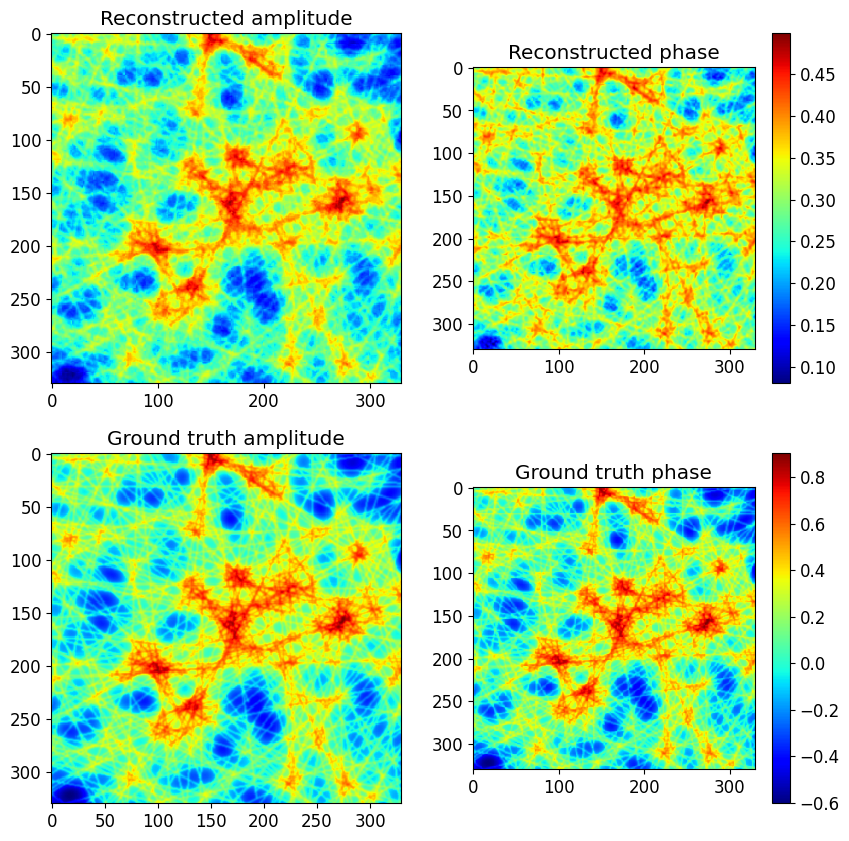

In [7]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# reconstructed amplitude images
img1 = axs[0, 0].imshow(np.absolute(stitched_obj)[0], cmap='jet', interpolation='none')
axs[0, 0].set_title('Reconstructed amplitude')

# reconstructed phase images
axs[0, 1].imshow(np.angle(stitched_obj)[0], cmap='jet')
fig.colorbar(img1, ax=axs[0, 1])
axs[0, 1].set_title('Reconstructed phase')

# ground truth amplitude images
img = axs[1, 0].imshow(np.absolute(init.YY_ground_truth), interpolation='none', cmap='jet')
axs[1, 0].set_title('Ground truth amplitude')

# ground truth phase images
img = axs[1, 1].imshow(np.angle(init.YY_ground_truth), interpolation='none', cmap='jet')
axs[1, 1].set_title('Ground truth phase')
fig.colorbar(img, ax=axs[1, 1])

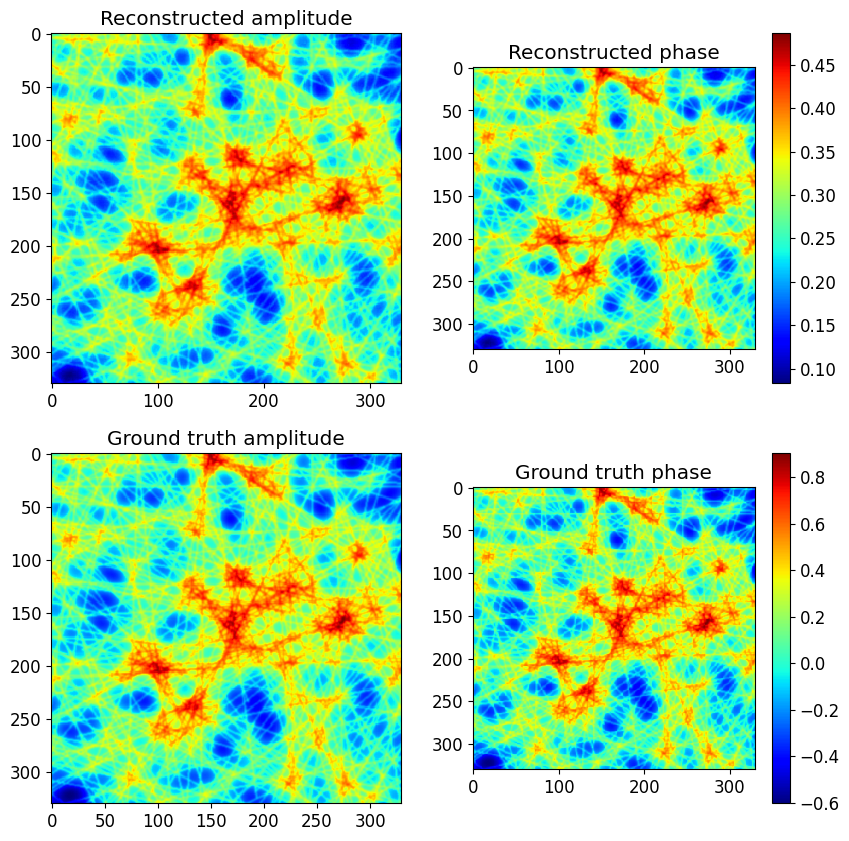

In [7]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# reconstructed amplitude images
img1 = axs[0, 0].imshow(np.absolute(stitched_obj)[0], cmap='jet', interpolation='none')
axs[0, 0].set_title('Reconstructed amplitude')

# reconstructed phase images
axs[0, 1].imshow(np.angle(stitched_obj)[0], cmap='jet')
fig.colorbar(img1, ax=axs[0, 1])
axs[0, 1].set_title('Reconstructed phase')

# ground truth amplitude images
img = axs[1, 0].imshow(np.absolute(init.YY_ground_truth), interpolation='none', cmap='jet')
axs[1, 0].set_title('Ground truth amplitude')

# ground truth phase images
img = axs[1, 1].imshow(np.angle(init.YY_ground_truth), interpolation='none', cmap='jet')
axs[1, 1].set_title('Ground truth phase')
fig.colorbar(img, ax=axs[1, 1])

In [6]:
d = save_metrics(stitched_obj, YY_ground_truth, label = 'PINN,NLL,overlaps')
d
#d0 = d

subtracting mean 0.01769005
subtracting mean 0.0
mean scale adjustment: 10.054351
mean scale adjustment: 10.054351
performed by index method
performed by index method
performed by index method
mean scale adjustment: 1
mean scale adjustment: 1


{'mae': (0.041894518, 0.003000273),
 'mse': (0.0028823914, 1.477335e-05),
 'psnr': (73.53327403635278, 96.43601377862296),
 'frc50': (166, nan)}

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# reconstructed amplitude images
img1 = axs[0, 0].imshow(np.absolute(stitched_obj)[0], cmap='jet', interpolation='none')
axs[0, 0].set_title('Reconstructed amplitude')

# reconstructed phase images
axs[0, 1].imshow(np.angle(stitched_obj)[0], cmap='jet')
fig.colorbar(img1, ax=axs[0, 1])
axs[0, 1].set_title('Reconstructed phase')

# ground truth amplitude images
img = axs[1, 0].imshow(np.absolute(init.YY_ground_truth), interpolation='none', cmap='jet')
axs[1, 0].set_title('Ground truth amplitude')

# ground truth phase images
img = axs[1, 1].imshow(np.angle(init.YY_ground_truth), interpolation='none', cmap='jet')
axs[1, 1].set_title('Ground truth phase')
fig.colorbar(img, ax=axs[1, 1])

In [ ]:
np.absolute(p.get('probe')).shape


phase min: 0.0 phase max: 2.9351377
phase min: 0.0 phase max: 2.9351377
phase min: 0.0 phase max: 2.9351377
phase min: 0.0 phase max: 2.9351377


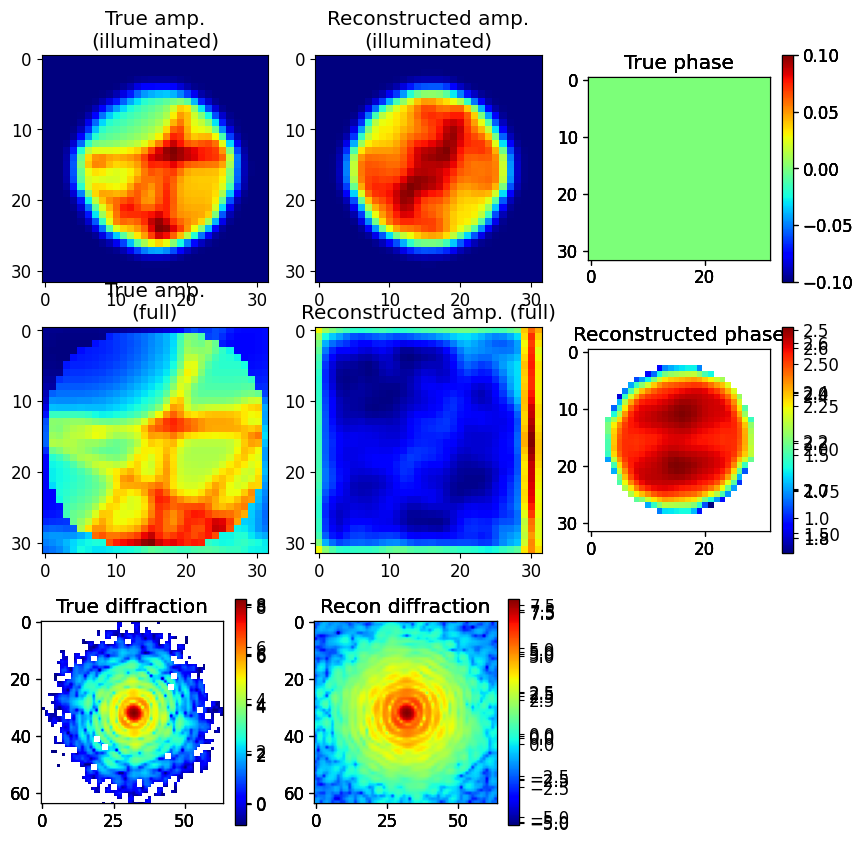

In [12]:
from ptycho import evaluation
idxs = list(range(0, 40, 10))
ptychopinn_heatmaps = [evaluation.summarize(i, pred_amp, reconstructed_obj,
                    X_test, Y_I_test, Y_phi_test, np.absolute(p.get('probe'))[:, :, 0], 0) for i in idxs]

In [8]:
from ptycho import evaluation
idxs = list(range(0, 100, 10))
ptychopinn_heatmaps = [evaluation.summarize(i, pred_amp, reconstructed_obj,
                    X_test, Y_I_test, Y_phi_test, np.absolute(p.get('probe'))[:, :, 0], 0) for i in idxs]

In [3]:
from ptycho import params as p
p.cfg['gridsize'] = 1
p.cfg['n_filters_scale'] = 1
p.cfg['set_phi'] = True

from ptycho.generate_data import *

from ptycho import baselines as bl
from ptycho import tf_helper as hh

reload(bl)

baseline_model, history = bl.train((X_train[:, :, :, :1]), Y_I_train[:, :, :, :1], Y_phi_train[:, :, :, :1])

plt.rcParams["figure.figsize"] = (10, 10)

baseline_pred_I, baseline_pred_phi = baseline_model.predict([X_test[:, :, :, 0]])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 64, 64, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 64, 64, 32)           320       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 64, 64, 32)           9248      ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)           0         ['conv2d_1[0][0]']            
 D)                                                                                           

2024-11-06 17:34:27.961014: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-11-06 17:34:28.722085: I external/local_xla/xla/service/service.cc:168] XLA service 0x7e77e12feea0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-11-06 17:34:28.722106: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-11-06 17:34:28.725736: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1730932468.785642 3515748 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


410/410 [==============================] - 9s 12ms/step - loss: 0.1969 - conv2d_12_loss: 0.0130 - conv2d_19_loss: 0.1839 - val_loss: 0.1774 - val_conv2d_12_loss: 0.0066 - val_conv2d_19_loss: 0.1708 - lr: 0.0010
Epoch 2/60
410/410 [==============================] - 3s 8ms/step - loss: 0.1722 - conv2d_12_loss: 0.0064 - conv2d_19_loss: 0.1658 - val_loss: 0.1932 - val_conv2d_12_loss: 0.0056 - val_conv2d_19_loss: 0.1876 - lr: 0.0010
Epoch 3/60
410/410 [==============================] - 3s 8ms/step - loss: 0.1661 - conv2d_12_loss: 0.0055 - conv2d_19_loss: 0.1606 - val_loss: 0.1765 - val_conv2d_12_loss: 0.0058 - val_conv2d_19_loss: 0.1707 - lr: 0.0010
Epoch 4/60
410/410 [==============================] - 3s 8ms/step - loss: 0.1646 - conv2d_12_loss: 0.0053 - conv2d_19_loss: 0.1593 - val_loss: 0.1857 - val_conv2d_12_loss: 0.0061 - val_conv2d_19_loss: 0.1796 - lr: 0.0010
Epoch 5/60
406/410 [============================>.] - ETA: 0s - loss: 0.1634 - conv2d_12_loss: 0.0052 - conv2d_19_loss: 0.1582

In [4]:
from ptycho.data_preprocessing import stitch_data as stitch

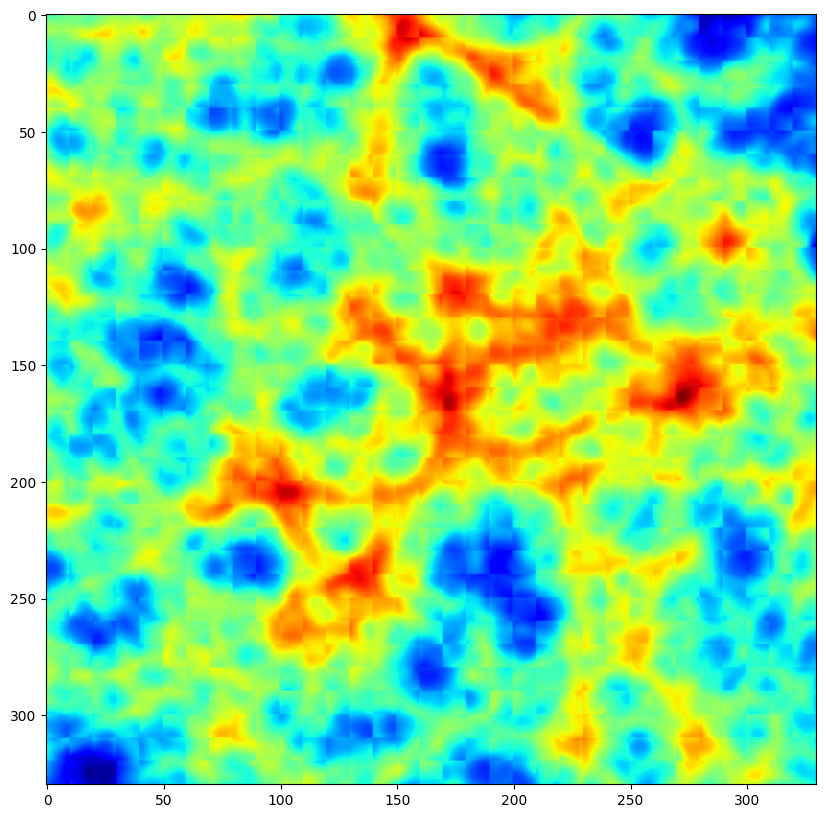

In [5]:
baseline_stitched = stitch(baseline_pred_I, norm_Y_I_test)

plt.imshow(baseline_stitched[0], cmap = 'jet')#, vmin = vmin, vmax = vmax)

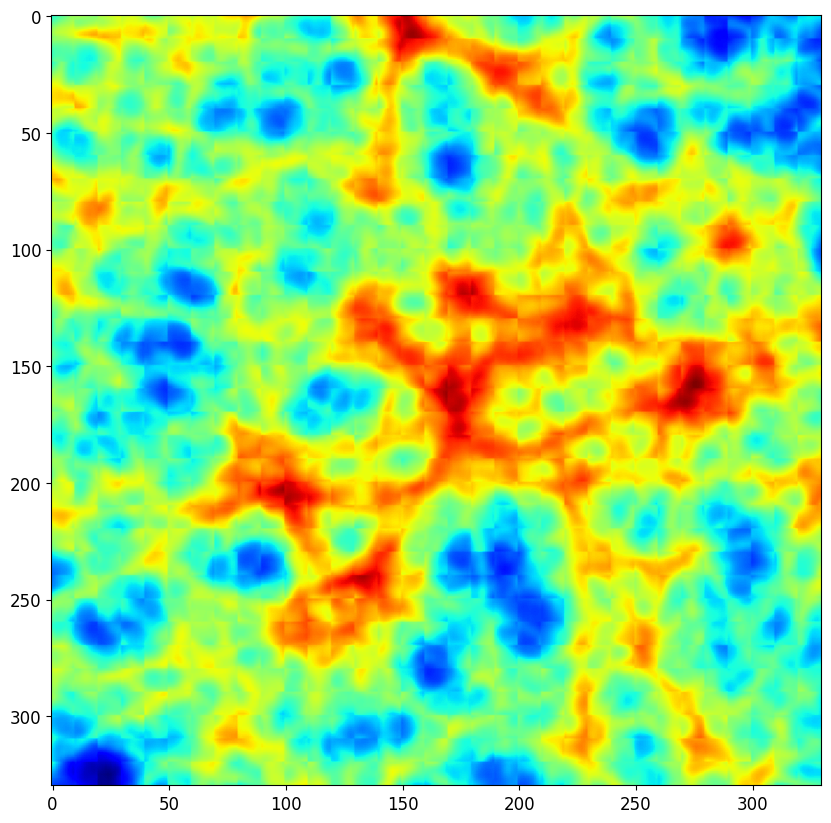

In [26]:
baseline_stitched = stitch(baseline_pred_I, norm_Y_I_test)

plt.imshow(baseline_stitched[0], cmap = 'jet')#, vmin = vmin, vmax = vmax)

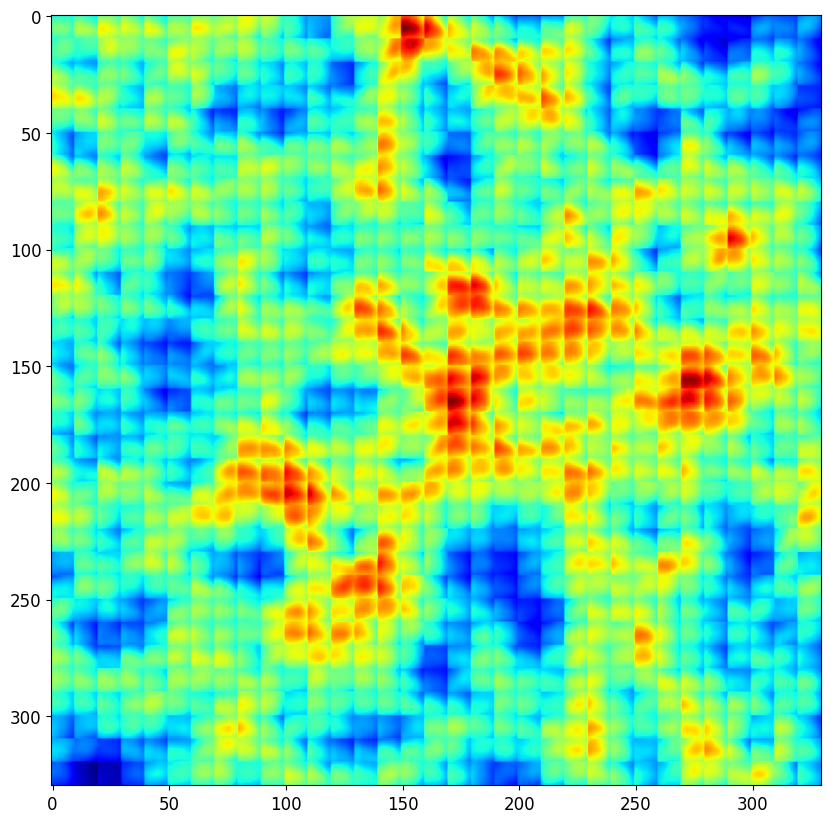

In [11]:
baseline_stitched = stitch(baseline_pred_I, norm_Y_I_test)

plt.imshow(baseline_stitched[0], cmap = 'jet')#, vmin = vmin, vmax = vmax)

In [9]:
from ptycho import evaluation
idxs = list(range(0, 100, 10))
ptychopinn_heatmaps = [evaluation.summarize(i, pred_amp, reconstructed_obj,
                    X_test, Y_I_test, Y_phi_test, np.absolute(p.get('probe'))[:, :, 0], 0) for i in idxs]

In [ ]:
from ptycho import evaluation

evaluation.plt_metrics(history, metric2 = 'trimmed_obj_loss')

## PINN, NLL, no overlap:

In [ ]:
from ptycho import train_pinn

In [ ]:
p.cfg['gridsize'] = 1
p.cfg['nll_weight'] = 1.
p.cfg['mae_weight'] = 0.

reload(init)
reload(train.model)
reload(train_pinn)

# print(p.cfg)
from ptycho.generate_data import *
from ptycho.train import *;

In [ ]:
from ptycho.generate_data import *
X_test.shape

In [ ]:
from ptycho import evaluation
pinn_heatmaps = [evaluation.summarize(i, train_pinn.pred_amp, train_pinn.reconstructed_obj,
                    X_test, Y_I_test, Y_phi_test, np.absolute(p.get('probe'))[:, :, 0], 0) for i in idxs]

In [ ]:
img_dict_ptychopinn = ptychopinn_heatmaps[0]
img_dict_pinn = pinn_heatmaps[0]

img_dict_pinn.keys()

# Compare reconstructions of PINN with and without overlaps

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.size'] = 10

fig, axs = plt.subplots(2, 3, figsize=(7.5, 5))

# Slicing for central 32x32 region
slice_32x32 = slice(img_dict_ptychopinn['true_amp_illuminated'].shape[0]//2 - 16, 
                    img_dict_ptychopinn['true_amp_illuminated'].shape[0]//2 + 16)

# Top row for diffraction
axs[0, 0].imshow(img_dict_ptychopinn['true_diffraction'], cmap='jet')
axs[0, 0].set_title('True diffraction')
axs[0, 0].axis('off')

axs[0, 1].imshow(img_dict_ptychopinn['rec_diffraction'], cmap='jet')
axs[0, 1].set_title('PtychoPINN: \n reconstructed diffraction')
axs[0, 1].axis('off')

axs[0, 2].imshow(img_dict_pinn['rec_diffraction'], cmap='jet')
axs[0, 2].set_title('PINN: \n reconstructed diffraction')
axs[0, 2].axis('off')

# Bottom row for amplitude
axs[1, 0].imshow(img_dict_ptychopinn['true_amp_illuminated'][slice_32x32, slice_32x32], cmap='jet')
axs[1, 0].set_title('True amplitude')
axs[1, 0].axis('off')

axs[1, 1].imshow(img_dict_ptychopinn['rec_amp_illuminated'][slice_32x32, slice_32x32], cmap='jet')
axs[1, 1].set_title('PtychoPINN: \n reconstructed amplitude')
axs[1, 1].axis('off')

axs[1, 2].imshow(img_dict_pinn['rec_amp_illuminated'][slice_32x32, slice_32x32], cmap='jet')
axs[1, 2].set_title('PINN: \n reconstructed amplitude')
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from matplotlib import rcParams

matplotlib.rcParams['font.size'] = 11
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']

fig, axs = plt.subplots(2, 3, figsize=(7.5, 5))

# Slicing for central 32x32 region
slice_32x32 = slice(img_dict_ptychopinn['true_amp_illuminated'].shape[0]//2 - 16, 
                    img_dict_ptychopinn['true_amp_illuminated'].shape[0]//2 + 16)

# Save true_diffraction as a variable for easier subtraction
true_diffraction = img_dict_ptychopinn['true_diffraction']

# Calculate difference for PtychoPINN and PINN

diff_ptychopinn = np.log(
    np.abs(np.exp(img_dict_ptychopinn['rec_diffraction']) - np.exp(true_diffraction) * intensity_scale)
)
diff_pinn = np.log(
    np.abs(np.exp(img_dict_pinn['rec_diffraction']) - np.exp(true_diffraction) * intensity_scale)
)

# Calculate vmin and vmax (use highest non-infinite value if vmax is np.inf)
vmin = 0#np.minimum(np.min(diff_ptychopinn), np.min(diff_pinn))

# Replace np.inf with a large finite number for max
max_ptychopinn = np.max(diff_ptychopinn[np.isfinite(diff_ptychopinn)]) if np.isinf(np.max(diff_ptychopinn)) else np.max(diff_ptychopinn)
max_pinn = np.max(diff_pinn[np.isfinite(diff_pinn)]) if np.isinf(np.max(diff_pinn)) else np.max(diff_pinn)
vmax = np.maximum(max_ptychopinn, max_pinn)

# Top row for diffraction
im1 = axs[0, 0].imshow(true_diffraction + np.log(intensity_scale), cmap='jet')
axs[0, 0].set_title('True diffraction \n (log)')
axs[0, 0].axis('off')
fig.colorbar(im1, ax=axs[0, 0])

im2 = axs[0, 1].imshow(diff_ptychopinn, cmap='jet', vmin=vmin, vmax=vmax)
axs[0, 1].set_title('PtychoPINN: diffraction \n error (log absolute)')
axs[0, 1].axis('off')
fig.colorbar(im2, ax=axs[0, 1])

im3 = axs[0, 2].imshow(diff_pinn, cmap='jet', vmin=vmin, vmax=vmax)
axs[0, 2].set_title('PINN: diffraction \n error (log absolute)')
axs[0, 2].axis('off')
fig.colorbar(im3, ax=axs[0, 2])

# Bottom row for amplitude
axs[1, 0].imshow(img_dict_ptychopinn['true_amp_illuminated'][slice_32x32, slice_32x32], cmap='jet')
axs[1, 0].set_title('True amplitude')
axs[1, 0].axis('off')

axs[1, 1].imshow(img_dict_ptychopinn['rec_amp_illuminated'][slice_32x32, slice_32x32], cmap='jet')
axs[1, 1].set_title('PtychoPINN: \n reconstructed amplitude')
axs[1, 1].axis('off')

axs[1, 2].imshow(img_dict_pinn['rec_amp_illuminated'][slice_32x32, slice_32x32], cmap='jet')
axs[1, 2].set_title('PINN: \n reconstructed amplitude')
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
def normed_ff_np(arr):
    return (f.fftshift(np.absolute(f.fft2(np.array(arr)))) / np.sqrt(h * w))

In [ ]:
from ptycho import fourier as f

# More real- and diffraction-space reconstructions

In [ ]:
# !ln ../xrd_clustering/notebooks/visualization.py
from ptycho import visualization as vis
reload(vis)

off = 5
i = 0

vmin = np.min(Y_I_test[:, 16:-16, 16:-16][i:i + off])
vmax = np.max(Y_I_test[:, 16:-16, 16:-16][i:i + off])

print('diffraction reconstruction')
vis.display_imgs(np.log(np.absolute(pred_amp[:, :, :, 0]))[i:i + off])

print('diffraction ground truth')
vis.display_imgs(np.log(np.absolute(X_test[:, :, :, 0]))[i:i + off])

print('object reconstruction (amp)')
vis.display_imgs(np.absolute(reconstructed_obj[:, 16:-16, 16:-16, 0])[i:i + off], vmin = vmin, vmax = vmax)
# print('object reconstruction (phase)')
# vis.display_imgs(np.angle(b[:, 16:-16, 16:-16, 0])[i:i + 10])#, vmin = vmin, vmax = vmax)
print('object ground truth')
vis.display_imgs(Y_I_test[:, 16:-16, 16:-16, 0][i:i + off], vmin = vmin, vmax = vmax)

In [ ]:
plt.rcParams["figure.figsize"] = (10, 5)


plt.subplot(2, 3, 1)

plt.imshow(Y_I_train[0, :, :, 0], cmap = 'jet')

plt.subplot(2, 3, 2)
plt.imshow(np.absolute(model.autoencoder.variables[-1]), cmap = 'jet')
# plt.colorbar()


plt.subplot(2, 3, 4)
plt.imshow(np.absolute(reconstructed_obj[100, :, :, 0]), cmap = 'jet')

plt.subplot(2, 3, 5)
tmp = np.absolute(f.fftshift(f.fft2(np.array(model.autoencoder.variables[-1][:, :, 0]))))
plt.imshow(np.log(tmp),
          cmap  ='jet')

plt.subplot(2, 3, 6)
plt.imshow(np.log(X_train[0, :, :, 0]), cmap = 'jet')

# for i, v in enumerate(model.autoencoder.variables):
#     print(i, v.shape)

In [ ]:
plt.rcParams["figure.figsize"] = (5, 5)
Itest = (X_test * p.get('intensity_scale'))**2
print(Itest.shape, np.max(Itest, axis = 1).max(axis = 1).mean())

plt.imshow(np.log(np.sqrt(Itest[0, :, :, 0])), cmap = 'jet')
plt.colorbar()